# Loops & Orbits &mdash; Week 3 &mdash; Day 1 &mdash; Jupyter Notebook

## Newton's Cannon with `numpy`

First, grab all of the imports. **Just execute the imports.** There is nothing here for you to change.

In [1]:
# Important math functions and the constant pi:
from math import sin, cos, atan2, sqrt, pi

# We will start using the high-performance numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each function we write:
import unittest

Next, define all the constants. **Just execute these assignments.** There is nothing here for you to change.

In [2]:
# The following two parameters are get us the strength of gravity at various heights:
g = 9.81                    # 9.81 m/s**2 at Earth surface
radius_of_earth = 6371000.0 # Earth radius in meters

# The following two variables define the cannonball launch conditions:
initial_position = [0.0, radius_of_earth + 500000.0]  # cannon is on a 500 km high mountain
initial_velocity = [7200.0, 0.0]                      # a good range of speeds to try is 3000 to 8000 m/s

# The following two parameters establish the simulation time step and its maximum total duration:
delta_t = 30.0              # simulation time step in seconds
simulation_time_steps = 80  # 40 minutes worth for a delta_t of 30.0

## Functions for Working with Vectors

All of these have already appeared in previous notebooks, but they must be re-implemented to take and return `np.ndarray`.

In [25]:
# computes horizontal and vertical components of a vector and returns them as a tuple
def vector_from_length_and_angle(length: float, angle: float) -> np.ndarray:
    # we are working in degrees -- python's are expecting radians -- convert degrees to radian
    angle_in_radians = angle * pi / 180.0
    x_component = length * cos(angle_in_radians)
    y_component = length * sin(angle_in_radians)
    return np.array([x_component, y_component])

# get angle from components using atan2 version of arctangent function -- result is converted to degrees
def angle_from_vector(vector: np.ndarray) -> float:
    # use the arctangent function
    angle_in_radians = atan2(vector[1], vector[0])  
    # we are working in degrees -- python's functions return radians -- convert radians to degrees
    angle = angle_in_radians * 180.0 / pi
    # return the result
    return angle

# get length from components using Pythagorean theorem
def length_from_vector(vector: np.ndarray) -> float:
    length_squared = np.sum(vector**2)
    return sqrt(length_squared)

### Unit tests ###

class VectorTests(unittest.TestCase):
    
    def test_vector_from_length_and_angle(self):
        vector = vector_from_length_and_angle(1000.0, 30.0)
        expected_vector = np.array([866.02540378, 500.0])
        self.assertTrue(np.allclose(vector, expected_vector),
                        msg="Expected {}, but got {}".format(expected_vector, vector))
        
    def test_angle_from_vector(self):
        angle = angle_from_vector(np.array([866.02540378, 500.0]))
        self.assertAlmostEqual(angle, 30.0)
        
    def test_length_from_vector(self):
        length = length_from_vector(np.array([5.0, 12.0]))
        self.assertAlmostEqual(length, 13.0)

testSuite = unittest.TestLoader().loadTestsFromName("__main__.VectorTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)

test_angle_from_vector (__main__.VectorTests) ... ok
test_length_from_vector (__main__.VectorTests) ... ok
test_vector_from_length_and_angle (__main__.VectorTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Functions to Get Acceleration of Gravity

**Below is the suite of four functions for you to implement.** Each function has comments saying what it should do.

**What is new relative to the last version of Newton's Cannon is that the functions take as an argument &mdash; or return as a value &mdash; a numpy array for the position.**

*Make your life easy!* Use the functions for working with vectors above. If you find you are using sqrt, cos, sin, etc. below you are re-doing work that is already complete and correct in the functions above.

*Each function has two unit tests, most of which are failing.* Keep working on your implementations until the 
unit tests pass. Then go on to the rest of the notebook.

In [4]:
import numpy as np

In [24]:
# The fancy function declaration with the : after position and the -> before float
# says what the type of the argument and the return value is. The older, simpler way we were
# declaring functions would have just begun with:

# def strength_of_gravity(position):
      # this function encodes the strength of gravity....
    
# The new way of doing declarations is longer, and it is a matter of taste whether it helps readability.
# The new way of doing declarations says the position arguments is an np.ndarray (a numpy
# n-dimensional array). It says that the function returns a Boolean.
def strength_of_gravity(position: np.ndarray) -> float:
    # this function encodes the strength of gravity as a function of distance from the center of the Earth
    radius = length_from_vector(position)
    strength = g * radius_of_earth**2 / radius**2
    return strength

def direction_of_gravity(position: np.ndarray) -> np.ndarray:
    # this function encodes the direction of gravity (the angle)
    # gravity is attractive -- it always points toward the center of the Earth
    direction = angle_from_vector(position) + 180.0
    return direction

def acceleration_of_gravity(position: np.ndarray) -> np.ndarray:
    # using the strength and direction functions you have just implemented compute and
    # returns a 2x1 array for the acceleration of gravity
    strength = strength_of_gravity(position)
    direction = direction_of_gravity(position)
    acceleration = vector_from_length_and_angle(strength, direction)
    return acceleration

### Unit tests ###

class GravityTests(unittest.TestCase):

    # tests of strength

    def test_strength_of_gravity(self):
        position = np.array([radius_of_earth, 0.0])
        strength = strength_of_gravity(position)
        self.assertAlmostEqual(strength, g)

    def test_strength_of_gravity_high_up(self):
        position = np.array([0.0, 2.0 * radius_of_earth])
        strength = strength_of_gravity(position)
        self.assertAlmostEqual(strength, 0.25 * g)
        
    # tests of direction
        
    def test_direction_of_gravity_left(self):
        position = np.array([100.0, 0.0])
        direction = direction_of_gravity(position)
        self.assertEqual(direction, 180.0)

    def test_direction_of_gravity_up(self):
        position = np.array([0.0, -100.0])
        direction = direction_of_gravity(position)
        self.assertEqual(direction, 90.0)
        
    # tests of acceleration

    def test_acceleration_of_gravity_g_left(self):
        position = np.array([radius_of_earth, 0.0])
        acceleration = acceleration_of_gravity(position)
        expected_acceleration = np.array([-g, 0.0])
        self.assertTrue(np.allclose(acceleration, expected_acceleration),
                        msg="Expected {}, but got {}".format(expected_acceleration, acceleration))

    def test_acceleration_of_gravity_4g_up(self):
        position = np.array([0.0, -radius_of_earth / 2.0])
        acceleration = acceleration_of_gravity(position)
        expected_acceleration = np.array([0.0, 4.0 * g])
        self.assertTrue(np.allclose(acceleration, expected_acceleration),
                        msg="Expected {}, but got {}".format(expected_acceleration, acceleration))

testSuite = unittest.TestLoader().loadTestsFromName("__main__.GravityTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)


test_acceleration_of_gravity_4g_up (__main__.GravityTests) ... ok
test_acceleration_of_gravity_g_left (__main__.GravityTests) ... ok
test_direction_of_gravity_left (__main__.GravityTests) ... ok
test_direction_of_gravity_up (__main__.GravityTests) ... ok
test_strength_of_gravity (__main__.GravityTests) ... ok
test_strength_of_gravity_high_up (__main__.GravityTests) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.006s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## The While Loop That Does the Work

**There is nothing for you to change below. You can just execute it once you've got your functions implemented.**

In [6]:
# Initialize the x and y velocities
velocities = np.zeros((simulation_time_steps, 2))
velocities[0] = initial_velocity

# Initialize the x and y positions
positions = np.zeros((simulation_time_steps, 2))
positions[0] = initial_position

# Initialize the times
times = np.zeros((simulation_time_steps,))

# The 0th elements of velocities, positions, and times are already filled in.
# Start the loop with i = 1
i = 1
while i < simulation_time_steps:
    #
    # get all the before values
    #
    # velocities
    before_velocity = velocities[i - 1]
    # positions
    before_position = positions[i - 1]
    # time
    before_time = times[i - 1]
    #
    # use the new acceleration_of_gravity function to get the accelerations
    #
    acceleration = acceleration_of_gravity(before_position)
    #
    # Euler-Cromer update code
    #
    # update the velocity
    after_velocity = before_velocity + delta_t * acceleration
    # update the position
    after_position = before_position + delta_t * after_velocity
    # update time
    after_time = before_time + delta_t
    #
    # assign the after values into their lists
    #
    velocities[i] = after_velocity
    positions[i] = after_position
    times[i] = after_time
    i = i + 1

## Graph

**Execute this to make a graph that looks a little like [the diagram Newton made](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Newton%27s_Principia_%281846%29.djvu/page519-1024px-Newton%27s_Principia_%281846%29.djvu.jpg).**

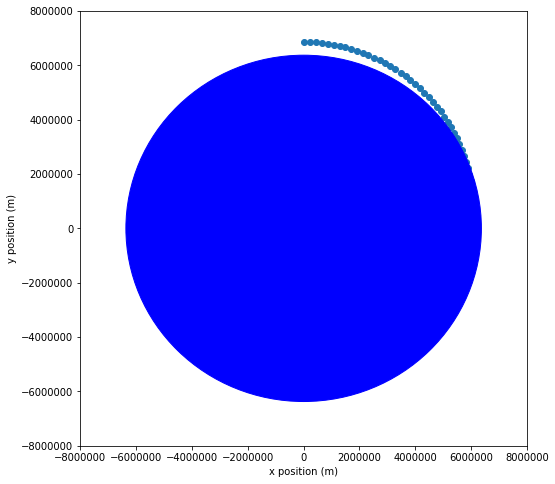

In [7]:

plt.figure(figsize=(8, 8))

x_positions = positions[:, 0]
y_positions = positions[:, 1]
plt.scatter(x_positions, y_positions)

plt.xlabel("x position (m)")
plt.ylabel("y position (m)")

# Some gibberish that draws a big blue circle representing the Earth:
earth = plt.Circle((0, 0), radius_of_earth, color='b')
plt.gcf().gca().add_artist(earth)

# Make the plot big enough to show the entire Earth:
plot_limit = 8000000
plt.xlim(-plot_limit, plot_limit)
plt.ylim(-plot_limit, plot_limit)

plt.show()

## Playing with the Simulation and Checkout Questions

Look at arc VF in [the diagram Newton made](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Newton%27s_Principia_%281846%29.djvu/page519-1024px-Newton%27s_Principia_%281846%29.djvu.jpg). For that arc the cannonball goes about 20% of the way around the Earth.

Play with `initial_speed` in the initialization cell. Each time you change it, re-execute the entire notebook.

A good range of values to try is 3000 to 8000 m/s. What makes an arc that is most like Newton's arc VF?

Show me or Ben that you can set a breakpoint in your `strength_of_gravity` function and inspect what is happening.